
[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


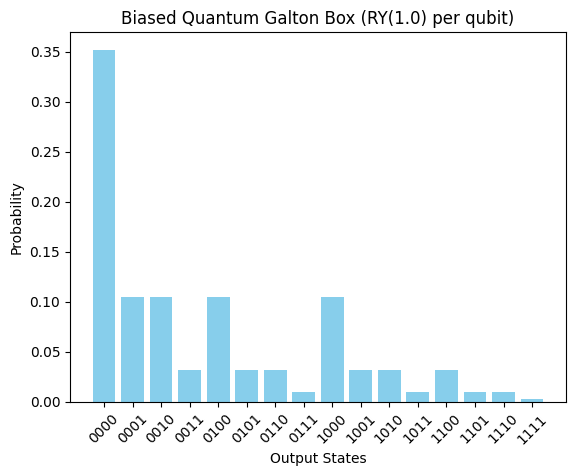

In [1]:
!pip install qiskit --quiet

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Number of qubits (levels)
n_qubits = 4

# Create circuit
qc = QuantumCircuit(n_qubits)

# Bias angle: π/2 = fair, other values = biased
theta = 1.0  # Try 0.5, 1.0, 2.0 for different biases

# Apply biased gates
for i in range(n_qubits):
    qc.ry(theta, i)

# Simulate
state = Statevector.from_instruction(qc)

# Convert probabilities to normal dict for plotting
probs_dict = {format(i, f'0{n_qubits}b'): p for i, p in enumerate(state.probabilities())}

# Plot
plt.bar(probs_dict.keys(), probs_dict.values(), color='skyblue')
plt.title(f"Biased Quantum Galton Box (RY({theta}) per qubit)")
plt.xlabel("Output States")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()